In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

To calculate the acceleration, I use the following equations.
$$a_{x,u} = \sum_{u \neq v} \frac{G m_v}{r_{u,v}^2} \frac{\Delta x_{u,v}}{r_{u,v}} = \sum_{u \neq v} \frac{G m_v\Delta x_{u,v}}{r_{u,v}^3}$$
$$a_{y,u} = \sum_{u \neq v} \frac{G m_v}{r_{u,v}^2} \frac{\Delta y_{u,v}}{r_{u,v}} = \sum_{u \neq v} \frac{G m_v\Delta y_{u,v}}{r_{u,v}^3}$$

Then I iterate the velocity and position using the Euler-Cromer method.
$$v_x[i+1] = v_x[i] + a_x[i] \Delta t$$
$$v_y[i+1] = v_y[i] + a_y[i] \Delta t$$
$$s_x[i+1] = s_x[i] + v_x[i+1] \Delta t$$
$$s_y[i+1] = s_y[i] + v_y[i+1] \Delta t$$

In [2]:
def gravitationalmotion(masses, initial_velocity, initial_position, total_time):
    #Here, I set up all of the initial conditions
    G = 1
    dt = 0.001 
    iterations = int(total_time / dt)
    num_bodies = len(masses)
    positions = np.zeros([iterations, num_bodies, 2]) #positions(iterations, body, dimension)
    velocities = np.zeros([iterations, num_bodies, 2]) #velocities(iterations, body, dimension)
    
    for i in range(num_bodies): #Now it's time to initialize the position and velocities
        for j in range(2):
            positions[0][i][j] = initial_position[i][j]
            velocities[0][i][j] = initial_velocity[i][j]
    
    for i in range(iterations-1): #Now we calculate the position of these objects for each timestep.
        distances = np.zeros([num_bodies, num_bodies])
        for u in range(num_bodies): #First well calculate the distance between each object
            for v in range(num_bodies):
                distances[u][v] = np.sqrt( (positions[i][u][0] - positions[i][v][0])**2 
                                          + (positions[i][u][1] - positions[i][v][1])**2 )
        
        accelerations = np.zeros([num_bodies, 2])
        for u in range(num_bodies):
            for v in range(num_bodies):
                if u != v:
                    accelerations[u][0] += ((G * masses[v] * (positions[i][v][0] - positions[i][u][0]))/(distances[u][v]**3)) 
                    accelerations[u][1] += ((G * masses[v] * (positions[i][v][1] - positions[i][u][1]))/(distances[u][v]**3))
        
        for j in range(num_bodies): #finally, we'll calculate the velocities and positions of each object
            velocities[i+1][j][0] = velocities[i][j][0] + (accelerations[j][0])*dt
            velocities[i+1][j][1] = velocities[i][j][1] + (accelerations[j][1])*dt
            positions[i+1][j][0] = positions[i][j][0] + (velocities[i+1][j][0])*dt
            positions[i+1][j][1] = positions[i][j][1] + (velocities[i+1][j][1])*dt
        
    return positions

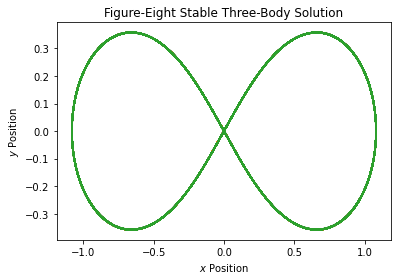

In [4]:
masses = [1,1,1]
initial_velocity = [[0.4662036850,0.4323657300],[0.4662036850,0.4323657300],[-0.93240737,-0.86473146]]
initial_position = [[-0.97000436,0.24308753],[0.97000436,-0.24308753],[0,0]]

#initial_velocity = [[0,0],[0,0],[0,0]]
#initial_position = [[3,-1],[-2,-2],[-1,3]]

positions = gravitationalmotion(masses, initial_velocity, initial_position, 1000)

for j in range(len(masses)):
    plt.plot(positions[:,j,0],positions[:,j,1])
plt.title('Figure-Eight Stable Three-Body Solution')
plt.ylabel(r'$y$ Position')
plt.xlabel(r'$x$ Position')
plt.show()

In [ ]:
masses = [1,1,1]
initial_velocity = [[0.4662036850,0.4323657300],[0.4662036850,0.4323657300],[-0.93240737,-0.86473146]]
initial_position = [[-0.97000436,0.24308753],[0.97000436,-0.24308753],[0,0]]
total_time = 5

positions = gravitationalmotion(masses, initial_velocity, initial_position, total_time)


fig, ax = plt.subplots()
plt.title('Figure-Eight Stable Three-Body Solution')
plt.ylabel(r'$y$ Position')
plt.xlabel(r'$x$ Position')
ax.set_xlim(( -1.5, 1.5))
ax.set_ylim((-0.5, 0.5))

line, = ax.plot([], [], lw=2)
def init():
    line.set_data([], [])
    return (line,)

def animate(n):
    x = positions[:n,0,0]
    y = positions[:n,0,1]
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, 
                               animate,
                               init_func = init,
                               frames=int(total_time / 0.001))
HTML(anim.to_html5_video())